In [ ]:
# Install the transformers package for importing DistilBERT model
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Libraries and Dataset

In [ ]:
# Import Libaries
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification, logging
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
logging.set_verbosity_error()

In [ ]:
# Import and Load Dataset from Tensorflow Datasets
import tensorflow_datasets as tfds
ds = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00', split='train', shuffle_files=True)
# Check if the imported dataset is an instance of tf.data.Dataset
assert isinstance(ds, tf.data.Dataset)
print(ds)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/104975 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incompleteHZXPHE/amazon_us_re…

Dataset amazon_us_reviews downloaded and prepared to ~/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.
<PrefetchDataset element_spec={'data': {'customer_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'helpful_votes': TensorSpec(shape=(), dtype=tf.int32, name=None), 'marketplace': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_category': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_parent': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_title': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_body': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_date': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_headline': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'star_rating': TensorSpec(shape=(), dtype=tf.int32, name=None), 'tota

In [ ]:
# Convert the imported dataset to dataframe format
df = tfds.as_dataframe(ds)

In [ ]:
# Show the top 5 consumer reviews present in the dataset
df.head()

,data/customer_id,data/helpful_votes,data/marketplace,data/product_category,data/product_id,data/product_parent,data/product_title,data/review_body,data/review_date,data/review_headline,data/review_id,data/star_rating,data/total_votes,data/verified_purchase,data/vine
0,b'20980074',0,b'US',b'Mobile_Electronics',b'B00D1847NE',b'274617424',b'Teenage Mutant Ninja Turtles Boombox CD Play...,b'Does not work',b'2015-01-09',b'One Star',b'R1OVS0D6SEXPW7',1,0,0,1
1,b'779273',0,b'US',b'Mobile_Electronics',b'B00KMO6DYG',b'397452138',b'4 Gauge Amp Kit Amplifier Install Wiring Com...,b'This is a great wiring kit i used it to set ...,b'2015-08-06',b'Great kit',b'R9VSD0ET8FERB',4,0,0,1
2,b'15410531',0,b'US',b'Mobile_Electronics',b'B000GWLL0K',b'948304826',b'Travel Wall Charger fits Creative Zen Vision...,b'It works great so much faster than USB charg...,b'2007-03-15',b'A/C Charger for Creative Zen Vision M',b'R3ISXCZHWLJLBH',5,0,0,1
3,b'27389005',0,b'US',b'Mobile_Electronics',b'B008L3JE6Y',b'466340015',b'High Grade Robust 360\xc2\xb0 Adjustable Car...,b'This product was purchased to hold a monitor...,b'2013-07-30',b'camera stand',b'R1TWVUDOFJSQAW',5,0,0,1
4,b'2663569',0,b'US',b'Mobile_Electronics',b'B00GHZS4SC',b'350592810',b'HDE Multifunctional Bluetooth FM Audio Car K...,"b""it works but it has really bad sound quality...",b'2014-12-31',b'bad sound quality',b'R2PEOEUR1LP0GH',3,0,0,1


## Exploratory Data Analysis (EDA)

In [ ]:
# Check the dataset size
df.shape

(104975, 15)

In [ ]:
# Check the columns name to find the useful columns for developing the Sentiment Analysis Model
df.info()

<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
RangeIndex: 104975 entries, 0 to 104974
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   data/customer_id        104975 non-null  object
 1   data/helpful_votes      104975 non-null  int32 
 2   data/marketplace        104975 non-null  object
 3   data/product_category   104975 non-null  object
 4   data/product_id         104975 non-null  object
 5   data/product_parent     104975 non-null  object
 6   data/product_title      104975 non-null  object
 7   data/review_body        104975 non-null  object
 8   data/review_date        104975 non-null  object
 9   data/review_headline    104975 non-null  object
 10  data/review_id          104975 non-null  object
 11  data/star_rating        104975 non-null  int32 
 12  data/total_votes        104975 non-null  int32 
 13  data/verified_purchase  104975 non-null  int64 
 14  data/vine 

In [ ]:
# Check the number of missing values
df.isnull().sum()

data/customer_id          0
data/helpful_votes        0
data/marketplace          0
data/product_category     0
data/product_id           0
data/product_parent       0
data/product_title        0
data/review_body          0
data/review_date          0
data/review_headline      0
data/review_id            0
data/star_rating          0
data/total_votes          0
data/verified_purchase    0
data/vine                 0
dtype: int64

In [ ]:
# Assign sentiment labels (Positive/Neutral/Negative) to each consumer review
# Mapping ratings 1 and 2 to Negative(0), 3 to Neutral(1), 4 and 5 to Positive(2)
def to_sentiment(rating):
  rating = int(rating)
  if rating <= 2:
    return 'negative'
  elif rating == 3:
    return 'neutral'
  else:
    return 'positive'

# Mapping
df["Sentiment"] = df["data/star_rating"].apply(to_sentiment)
df['Sentiment'] = df['Sentiment'].map({'positive':2, 'negative':0, 'neutral': 1})

In [ ]:
# Convert the customer review into string format
df['Customer_Review'] = df['data/review_body'].str.decode("utf-8")

In [ ]:
# Filter the dataset to keep only the useful columns (Customer Review and Sentiment)
df = df[["Customer_Review", "Sentiment"]]

In [ ]:
# Dropping last n rows using drop
n = 54975
df.drop(df.tail(n).index,
        inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# Check number of reviews in the dataset
index = df.index
number_of_rows = len(index)
print(number_of_rows)

50000


In [ ]:
# Seperate the customer review and sentiment and store in different list
reviews = df['Customer_Review'].values.tolist()
labels = df['Sentiment'].tolist()

In [ ]:
# Check the list
print(reviews[:2])
print(labels[:2])

['Does not work', 'This is a great wiring kit i used it to set up my Pyle 2000 watt amp to 2 alpine subs and worked just fine. im not sure about the power cord and its length because my battery is in the back but the ground cord is a bit short and thats its only flaw and that why i gave it 4 stars. great kit']
[0, 2]


## Train/ Test Split

In [ ]:
# Split the dataset into training and validation data with ratio 8:2
from sklearn.model_selection import train_test_split
training_sentences, validation_sentences, training_labels, validation_labels = train_test_split(reviews, labels, test_size=.2)

## Tokenization

In [ ]:
# Create an instance to store the tokenizer model
# In the distilbert-base-uncased model, all text is lowercased before being processed by the model. 
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
# Perform word tokenization and assign each word a unique token ID based on its position 
# Truncate the input text if it is longer than the specified "max_length" argument
# Add padding tokens to the beginning and end of the input text if it is shorter than the specified "max_length" argument
tokenizer([training_sentences[0]], truncation=True, padding=True, max_length=128)

{'input_ids': [[101, 1045, 2428, 4669, 1996, 2553, 2640, 2006, 2023, 1010, 1996, 14590, 5794, 2094, 2003, 14057, 1012, 13718, 2087, 2132, 9864, 13354, 2015, 3685, 7532, 2043, 1996, 3953, 2112, 1997, 1996, 2553, 2003, 2006, 1012, 2036, 1996, 3715, 2099, 2008, 2234, 2007, 2023, 2515, 2025, 2147, 2007, 1996, 1017, 2290, 26322, 3543, 1012, 2044, 13354, 4726, 2009, 1999, 1045, 2131, 1996, 4471, 1032, 1032, 1000, 13003, 2003, 2025, 3569, 2007, 2023, 25339, 1032, 1032, 1000, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
# DistilBERT word tokenization as input to the DistilBERT model
train_encodings = tokenizer(training_sentences,
                            truncation=True,
                            padding=True)
val_encodings = tokenizer(validation_sentences,
                            truncation=True,
                            padding=True)

In [ ]:
# Combine the word encodings with the sentiment labels for both train and validation dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    training_labels
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    validation_labels
))

## Model Training

In [ ]:
# Create an instance to store the initialized DistilBERT model
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=3)

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

In [ ]:
# Create an instance of the "Adam" optimizer class
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)
# Specify the details of the training process
model.compile(optimizer=optimizer, loss=model.hf_compute_loss, metrics=['accuracy'])

# Start Model Fitting with Fine-tuning
model.fit(train_dataset.shuffle(100).batch(16),
          epochs=6,
          batch_size=16,
          validation_data=val_dataset.shuffle(100).batch(16))

Epoch 1/6
2500/2500 [==============================] - 2495s 994ms/step - loss: 0.3869 - accuracy: 0.8544 - val_loss: 0.3412 - val_accuracy: 0.8704
Epoch 2/6
2500/2500 [==============================] - 2484s 994ms/step - loss: 0.2755 - accuracy: 0.8956 - val_loss: 0.3543 - val_accuracy: 0.8635
Epoch 3/6
2500/2500 [==============================] - 2484s 994ms/step - loss: 0.1958 - accuracy: 0.9269 - val_loss: 0.4123 - val_accuracy: 0.8643
Epoch 4/6
2500/2500 [==============================] - 2484s 994ms/step - loss: 0.1463 - accuracy: 0.9481 - val_loss: 0.4779 - val_accuracy: 0.8611
Epoch 5/6
2500/2500 [==============================] - 2483s 993ms/step - loss: 0.1098 - accuracy: 0.9624 - val_loss: 0.4890 - val_accuracy: 0.8466
Epoch 6/6
2500/2500 [==============================] - 2484s 993ms/step - loss: 0.0826 - accuracy: 0.9718 - val_loss: 0.5388 - val_accuracy: 0.8547


## Export Model

In [ ]:
# Save the fine-tuned model
model.save_pretrained("./DistilBERT_model")

## Model Performance

In [ ]:
# Load sentiment analysis model
loaded_model = TFDistilBertForSequenceClassification.from_pretrained("./DistilBERT_model")

In [ ]:
# Calculate the confusion matrix
y_preds = []

# Iterate on the validation dataset
for val_text in validation_sentences:
  # Encode the sentences
  tokenized_val_text = tokenizer.encode(val_text,
                                        truncation=True,
                                        padding=True,
                                        return_tensors="tf")
  # Predict the sentiment
  tf_output = loaded_model.predict(tokenized_val_text)[0]
  tf_prediction = tf.nn.softmax(tf_output, axis=1)
  label = tf.argmax(tf_prediction, axis=1)
  label = label.numpy()
  y_preds.append(label[0])
model_matrix = confusion_matrix(validation_labels, y_preds)
print(model_matrix)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 33ms/step
[[1854  352  163]
 [ 190  454  320]
 [  75  353 6239]]


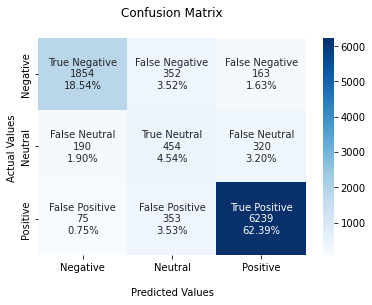

In [ ]:
# Confusion Matrix Visualization
group_names = ['True Negative','False Negative','False Negative','False Neutral','True Neutral','False Neutral','False Positive','False Positive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in model_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in model_matrix.flatten()/np.sum(model_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(model_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Class labels
ax.xaxis.set_ticklabels(['Negative','Neutral','Positive'])
ax.yaxis.set_ticklabels(['Negative','Neutral','Positive'])

# Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Calculate Accuracy, Precision, Recall, F1-Score, Micro Averaging, Macro Averaging, and Weighted Averaging
labels = ['Negative', 'Neutral', 'Positive']

# Overall Accuracy
accuracy = np.sum(np.diagonal(model_matrix)) / np.sum(model_matrix)
print("Accuracy:", round(accuracy, 4))
print()

# Precision, Recall, and F1-score for each class
precision = np.empty(3)
recall = np.empty(3)
f1_score = np.empty(3)
for i in range(3):
    precision[i] = model_matrix[i, i] / np.sum(model_matrix[:, i])
    recall[i] = model_matrix[i, i] / np.sum(model_matrix[i, :])
    f1_score[i] = 2 * precision[i] * recall[i] / (precision[i] + recall[i])
    print(labels[i])
    print("Precision:", round(precision[i], 4))
    print("Recall:", round(recall[i], 4))
    print("F1-score:", round(f1_score[i], 4))
    print()

# Micro-averaged Precision, Recall, and F1-score
micro_precision = np.sum(np.diagonal(model_matrix)) / np.sum(model_matrix)
micro_recall = np.sum(np.diagonal(model_matrix)) / np.sum(model_matrix)
micro_f1_score = 2 * micro_precision * micro_recall / (micro_precision + micro_recall)
print("Micro-averaged precision:", round(micro_precision, 4))
print("Micro-averaged recall:", round(micro_recall, 4))
print("Micro-averaged F1-score:", round(micro_f1_score, 4))
print()

# Macro-averaged Precision, Recall, and F1-score
macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1_score = np.mean(f1_score)
print("Macro-averaged precision:", round(macro_precision, 4))
print("Macro-averaged recall:", round(macro_recall, 4))
print("Macro-averaged F1-score:", round(macro_f1_score, 4))
print()

# Weighted-averaged Precision, Recall, and F1-score
num_instances = np.sum(model_matrix)
weighted_precision = np.sum(precision * np.sum(model_matrix, axis=1) / num_instances)
weighted_recall = np.sum(recall * np.sum(model_matrix, axis=1) / num_instances)
weighted_f1_score = np.sum(f1_score * np.sum(model_matrix, axis=1) / num_instances)
print("Weighted-averaged precision:", round(weighted_precision, 4))
print("Weighted-averaged recall:", round(weighted_recall, 4))
print("Weighted-averaged F1-score:", round(weighted_f1_score, 4))

Accuracy: 0.8547

Negative
Precision: 0.8749
Recall: 0.7826
F1-score: 0.8262

Neutral
Precision: 0.3917
Recall: 0.471
F1-score: 0.4277

Positive
Precision: 0.9281
Recall: 0.9358
F1-score: 0.932

Micro-averaged precision: 0.8547
Micro-averaged recall: 0.8547
Micro-averaged F1-score: 0.8547

Macro-averaged precision: 0.7316
Macro-averaged recall: 0.7298
Macro-averaged F1-score: 0.7286

Weighted-averaged precision: 0.8638
Weighted-averaged recall: 0.8547
Weighted-averaged F1-score: 0.8583


## Predict Sentiments using Model

In [ ]:
test_sentence = "The product not so beautiful"

predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

tf_output = loaded_model.predict(predict_input)[0]


tf_prediction = tf.nn.softmax(tf_output, axis=1)
labels = ['Negative', 'Neutral', 'Positive']
label = tf.argmax(tf_prediction, axis=1)
label = label.numpy()
print(labels[label[0]])

1/1 [==============================] - 0s 29ms/step
Negative
